In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

### Read the files

In [2]:
with open("./id_to_class.json", "r") as f:
    id_to_class = json.load(f)

df = pd.read_csv("./metadataTrain.csv")

### Display the class repartition

In [3]:
from collections import Counter, OrderedDict

classes = list(df["CLASS"])
classes_repartition = {
    k : v for k,v in Counter(classes).items()
}
classes_repartition = OrderedDict(sorted(classes_repartition.items())) # Have it in the correct order
classes_repartition = {
    id_to_class[str(k)] : v*100 / sum(list(classes_repartition.values())) for k,v in classes_repartition.items()
}

We notice that there is class imbalance ! Let's check the repartition. Some classes are over-represented, let's find weights to represent this repartition.

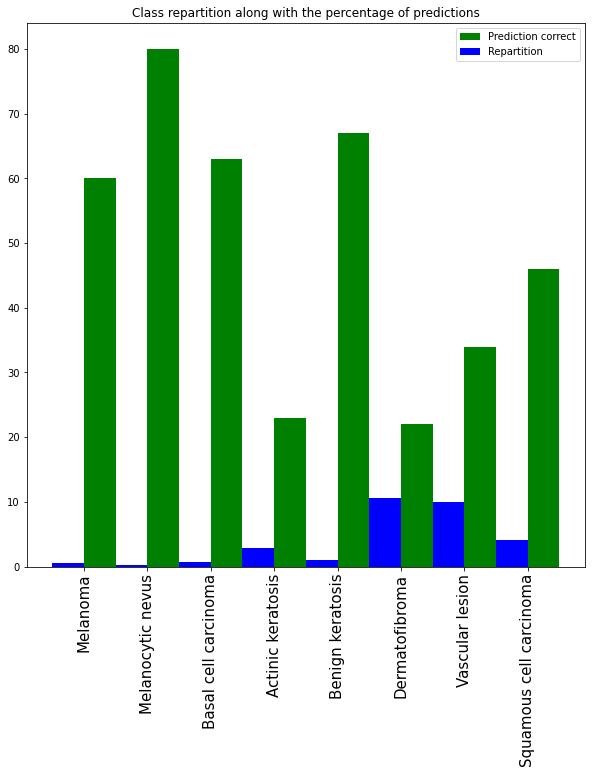

In [7]:
plt.figure(figsize=(10,10))
plt.bar(classes_weights.keys(), [60,80,63,23,67,22,34,46], color='g',label="Prediction correct", align="edge", width=0.5)
plt.bar(classes_weights.keys(), list(classes_weights.values()), color='b', label="Repartition", align="edge", width=-0.5)
plt.title("Class repartition along with the percentage of predictions")
plt.xticks(rotation=90,fontsize=15)
plt.legend()
plt.show()

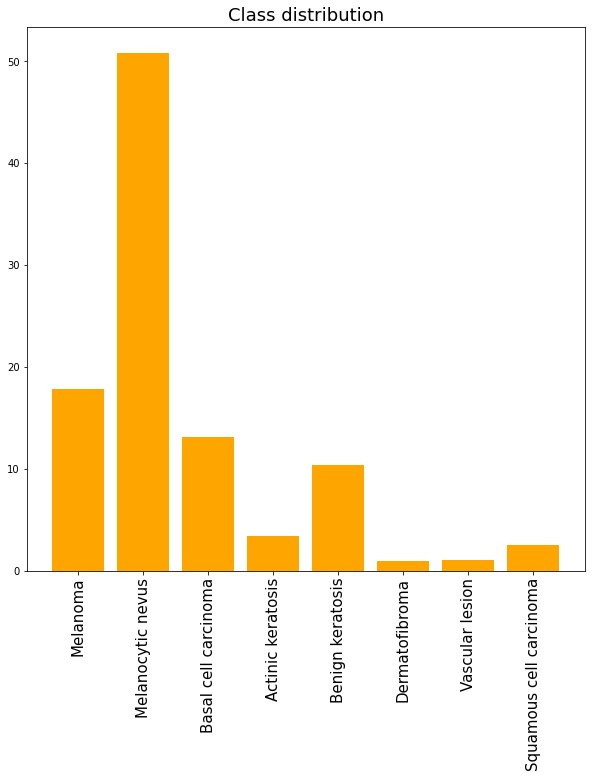

In [4]:
plt.figure(figsize=(10,10))
plt.bar(classes_repartition.keys(), list(classes_repartition.values()), color='orange')
plt.title("Class distribution", fontsize=18)
plt.xticks(rotation=90,fontsize=15)
plt.show()

Let's define a weight inversely proportional to their repartition. Multiply it by 10 so they are somehow around 1. Save this so it can be used for training.

In [4]:
classes_weights = {
    k : 10*1/v for k, v in classes_repartition.items()
}
with open("classes_weights.json", "w") as f :
    json.dump(classes_weights, f)

Matching the weights of the test set for comparison

In [11]:
[
    v * 0.7005531 / 0.560247714 for k, v in classes_weights.items()
]

[0.7005531006733393,
 0.24599519150702018,
 0.9532807240703428,
 3.654731637512759,
 1.2071014046663078,
 13.271371868063095,
 12.503029286227862,
 5.0436848500706875]